In [31]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
#Load the dataset
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [33]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [35]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [36]:
x=df.iloc[:,2:4].values
y=df.iloc[:,4].values
print("x=\n",x[:5,:])
print("y=\n",y[:5])

x=
 [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
y=
 [0 0 0 0 0]


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)

In [38]:
print("x_train=\n",x_train[:5,:])
print("x_test=\n",x_test[:5,:])
print("y_train=\n",y_train[:5])
print("y_test=\n",y_test[:5])

x_train=
 [[    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]]
x_test=
 [[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]
y_train=
 [0 0 0 0 1]
y_test=
 [0 0 0 0 0]


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
divide=LogisticRegression(random_state = 0, solver='lbfgs')
divide.fit(x_train,y_train)
y_pred=divide.predict(x_test)
print(y_pred[:10])

[0 0 0 0 0 0 0 1 0 1]


In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[31,  1],
       [ 1,  7]])

<AxesSubplot:>

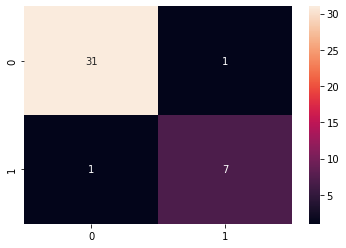

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
print('TN : ',TN)
print('FN : ',FN)
print('TP : ',TP)
print('FP : ',FP)
test_score = (TP + TN)/(TP + TN + FP + FN)
print('Model Testing Accuracy = ',test_score)

TN :  31
FN :  1
TP :  7
FP :  1
Model Testing Accuracy =  0.95


In [44]:
p = TP/(TP+FP)
c = TP/(TP+FN)
print('Precision : ',TP/(TP+FP))
print('Recall : ',TP/(TP+FN))

Precision :  0.875
Recall :  0.875


In [45]:
print('F1Score : ',2*p*c/(c+p))

F1Score :  0.875


### Conclusion: 
#### This Confusion Matrix tells us that there were 38 correct predictions and 2 incorrect ones, meaning the model overall accomplished an 95% accuracy rating. 